## Imports and Setup

In [10]:
from helper_functions_wine import pd, os, shutil
from helper_functions_wine import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation, organize_photos_in_folders

### Try to get library versions matching the following:

In [11]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.23.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              9.3.0


## Data Loading and Cleaning

In [12]:
# FIXME - update the filename to point to your dataset
filename = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/csv/winequality-red.csv"
df = pd.read_csv(filename)

### Spend some time familiarizing yourself with your dataset. Here are some basic commands

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect! Everything else will be plug and play!

In [15]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
# The 'id' column will be used to name the photos of the samples
classification_id = 'quality'
df = add_id_column(df, classification_id) #changed function to deal with int values
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5-1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,5-2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,5-3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,6-1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,5-680
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,6-636
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,6-637
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,5-681


In [16]:
# FIXME - get the correct values in the x and Y variables for your dataset
# As long as you have the correct value in `classification_id` from earlier, you shouldn't need any changes here unless there is another column you want to drop
# For instance, if you have an overfit feature such as a timestamp, you can drop it here
x = df.drop([classification_id, 'Id'], axis=1)
Y = df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (1599, 11)
Y (1599,)
This value should be True: True


## Image Generation

In [17]:
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change
image_directory = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine"
feature_types = get_column_data_types(x)
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 1599 samples to binary: 4.971003770828247 seconds. Seconds per sample = 0.003108820369498591


## Place Folders into the Correct Categories

In [19]:
organize_photos_in_folders(image_directory, Y)

1599
{'5': 681, '6': 638, '7': 199, '4': 53, '8': 18, '3': 10}


In [20]:
#FIXME Upload your photos to the Google Drive Data Folder!

## Train ResNet50
If you used my yaml files where there are two conda environments, this is the stage where you will change to the `keras_gpu` environment. If you used the alternative method, you should be in the correct environment already.

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./imgs/tensorboard.png)

In [21]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

In [22]:
# FIXME - update the values below to match your dataset
# Multiple of 2 such that it is greater than or equal to the number of features you have
img_size = 64
target_size = (img_size,img_size)
# Number of classification types (classes) in your dataset
num_classes = 6
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 100
# Number of times to run through training a model
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
# Number of times to run through the entire dataset
number_of_epochs = 100

In [23]:
#Changed values to tune for results
#In resnet.py -> get_callbacks() -> patiences to stop=50 & patience to reduce lr=30
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 1282 images belonging to 6 classes.
Found 317 images belonging to 6 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
13/13 [==============================] - 25s 942ms/step - loss: 1.5962 - acc: 0.4095 - f1_m: 0.3275 - precision_m: 0.4140 - recall_m: 0.2746 - auc: 0.7868 - false_negatives: 929.0000 - false_positives: 468.0000 - true_negatives: 5942.0000 - true_positives: 353.0000 - mean_absolute_error: 0.2165 - mean_squared_error: 0.1282 - val_loss: 4371.4141 - val_acc: 0.4290 - val_f1_m: 0.4254 - val_precision_m: 0.4254 - val_recall_m: 0.4254 - val_auc: 0.6574 - val_false_negatives: 181.0000 - val_false_positives: 181.0000 - val_true_negatives: 1404.0000 - val_true_positives: 136.0000 - val_mean_absolute_error: 0.1903 - val_mean_squared_error: 0.1903

Epoch 00001: val_acc improved from -inf to 0.42902, saving model to C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine/results\fold0-resnet50v2-saved-model-01-val_acc-0.43.hdf5
Epoch 2/100
13/13 [==============================] - 1s 113ms/step - loss: 1.2798 - acc: 0.4197 - f1_m: 0.2153 - precision_m:

In [24]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.0021484969358425586, 'acc': 0.9996879816055297, 'f1_m': 0.9996585249900818, 'precision_m': 0.9996585369110107, 'recall_m': 0.9996585369110107, 'auc': 0.9999995827674866, 'false_negatives': 2.0, 'false_positives': 2.0, 'true_negatives': 6408.0, 'true_positives': 1280.0, 'mean_absolute_error': 0.0006648696900811047, 'mean_squared_error': 6.381373905242071e-05, 'val_loss': 3.338344621658325, 'val_acc': 0.4927444696426392, 'val_f1_m': 0.4981631875038147, 'val_precision_m': 0.5030835211277008, 'val_recall_m': 0.49341177344322207, 'val_auc': 0.749451220035553, 'val_false_negatives': 163.0, 'val_false_positives': 157.0, 'val_true_negatives': 1428.0, 'val_true_positives': 154.0, 'val_mean_absolute_error': 0.16999034881591796, 'val_mean_squared_error': 0.15065868198871613, 'lr': 0.001999999862164259}


In [25]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.0004017303872387856, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_3': 1.0, 'false_negatives_3': 0.0, 'false_positives_3': 0.0, 'true_negatives_3': 6410.0, 'true_positives_3': 1282.0, 'mean_absolute_error': 0.00013337412383407354, 'mean_squared_error': 9.948395245373831e-07, 'val_loss': 3.309025526046753, 'val_acc': 0.5141955614089966, 'val_f1_m': 0.544346809387207, 'val_precision_m': 0.5495724081993103, 'val_recall_m': 0.5392646789550781, 'val_auc_3': 0.7773318290710449, 'val_false_negatives_3': 155.0, 'val_false_positives_3': 147.0, 'val_true_negatives_3': 1438.0, 'val_true_positives_3': 162.0, 'val_mean_absolute_error': 0.16245271265506744, 'val_mean_squared_error': 0.1416815221309662, 'lr': 0.0019999999}


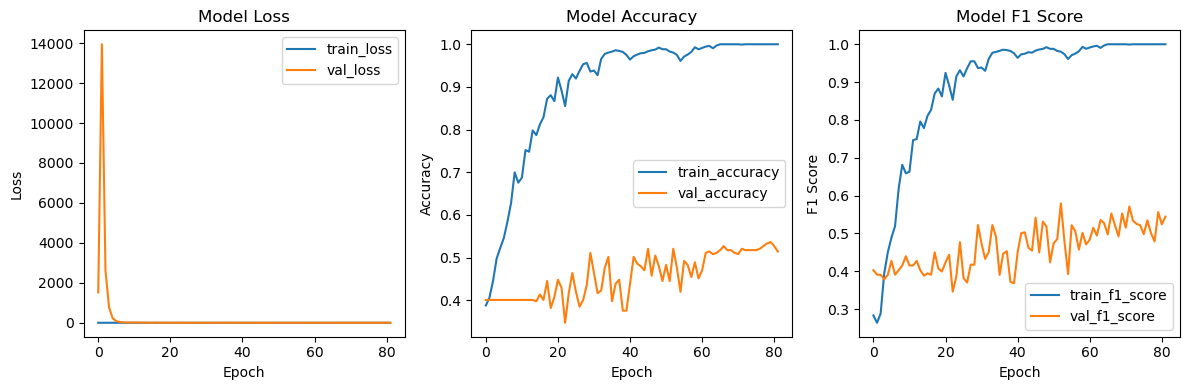

In [26]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [27]:
#FIXME - update the directories to point where you would like
image_directory = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine-correlated"
new_dir = image_directory + '/data/'

In [28]:
correlated_order = order_columns_by_correlation(df, classification_id, True)

ordering columns by correlation: quality, 13, [5 6 7 4 8 3]


In [29]:
correlated_df = df.reindex(columns=correlated_order)

In [30]:
x = correlated_df.drop([classification_id, 'Id'], axis=1)
Y = correlated_df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (1599, 11)
Y (1599,)
This value should be True: True


In [31]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
#image_directory = "/mnt/sda1/image-results-iris-correlated"
feature_types = get_column_data_types(x)
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [32]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 1599 samples to binary: 4.79867959022522 seconds. Seconds per sample = 0.0030010504003910067


In [33]:
organize_photos_in_folders(image_directory, Y)

1599
{'5': 681, '6': 638, '7': 199, '4': 53, '8': 18, '3': 10}


In [34]:
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 1282 images belonging to 6 classes.
Found 317 images belonging to 6 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
13/13 [==============================] - 29s 2s/step - loss: 1.7782 - acc: 0.3588 - f1_m: 0.2649 - precision_m: 0.3643 - recall_m: 0.2141 - auc_5: 0.7563 - false_negatives_5: 1007.0000 - false_positives_5: 480.0000 - true_negatives_5: 5930.0000 - true_positives_5: 275.0000 - mean_absolute_error: 0.2265 - mean_squared_error: 0.1358 - val_loss: 10492.5439 - val_acc: 0.4290 - val_f1_m: 0.4254 - val_precision_m: 0.4254 - val_recall_m: 0.4254 - val_auc_5: 0.6574 - val_false_negatives_5: 181.0000 - val_false_positives_5: 181.0000 - val_true_negatives_5: 1404.0000 - val_true_positives_5: 136.0000 - val_mean_absolute_error: 0.1903 - val_mean_squared_error: 0.1903

Epoch 00001: val_acc improved from -inf to 0.42902, saving model to C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine-correlated/results\fold0-resnet50v2-saved-model-01-val_acc-0.43.hdf5
Epoch 2/100
13/13 [==============================] - 1s 96ms/step - loss: 1.2631 - acc: 0.4111 

In [35]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.006662178388796747, 'acc': 0.9982839345932006, 'f1_m': 0.998609972000122, 'precision_m': 0.9990707159042358, 'recall_m': 0.998153829574585, 'auc_5': 1.0, 'false_negatives_5': 0.0, 'false_positives_5': 0.0, 'true_negatives_5': 6410.0, 'true_positives_5': 1282.0, 'mean_absolute_error': 0.001791613525711, 'mean_squared_error': 0.00038100182282505555, 'val_loss': 3.3452172756195067, 'val_acc': 0.5034700155258178, 'val_f1_m': 0.5212839663028717, 'val_precision_m': 0.5267212510108947, 'val_recall_m': 0.5160588264465332, 'val_auc_5': 0.7548955678939819, 'val_false_negatives_5': 156.0, 'val_false_positives_5': 151.0, 'val_true_negatives_5': 1434.0, 'val_true_positives_5': 161.0, 'val_mean_absolute_error': 0.1680396765470505, 'val_mean_squared_error': 0.14898504614830016, 'lr': 0.001999999862164259}


In [36]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.024227101355791092, 'acc': 0.9914196729660034, 'f1_m': 0.9930498600006104, 'precision_m': 0.9953535795211792, 'recall_m': 0.9907691478729248, 'auc_8': 0.9999728202819824, 'false_negatives_8': 12.0, 'false_positives_8': 6.0, 'true_negatives_8': 6404.0, 'true_positives_8': 1270.0, 'mean_absolute_error': 0.006069420836865902, 'mean_squared_error': 0.001702987472526729, 'val_loss': 3.0981359481811523, 'val_acc': 0.539432168006897, 'val_f1_m': 0.5691666603088379, 'val_precision_m': 0.5745362639427185, 'val_recall_m': 0.5639705657958984, 'val_auc_8': 0.7840062379837036, 'val_false_negatives_8': 150.0, 'val_false_positives_8': 142.0, 'val_true_negatives_8': 1443.0, 'val_true_positives_8': 167.0, 'val_mean_absolute_error': 0.160800501704216, 'val_mean_squared_error': 0.1399811953306198, 'lr': 0.0019999999}


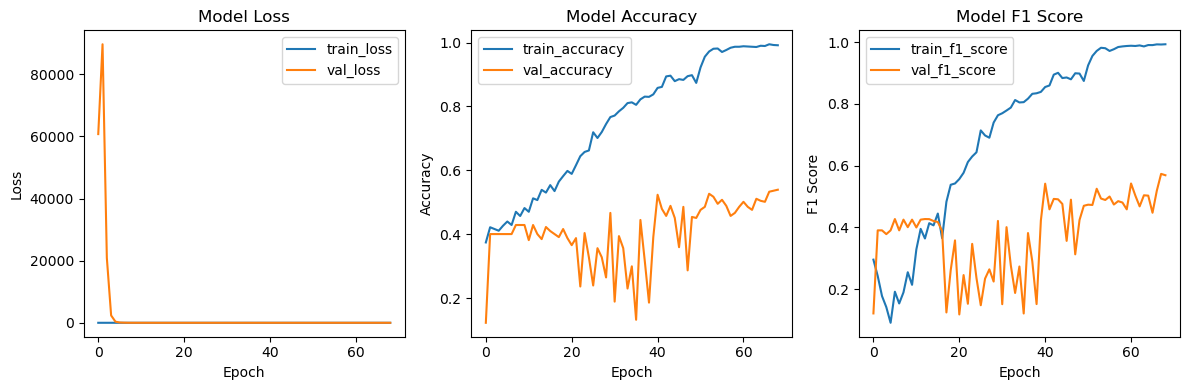

In [37]:
plot_metrics(best_model.history)

# TEST (to be implemented)